<a href="https://colab.research.google.com/github/mz1119/cup-classification-model/blob/main/Ellipse_VIA_JSON_to_Mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import json
from PIL import Image, ImageDraw
import math

In [ ]:
data_frame = pd.read_json('/content/drive/My Drive/Blue Hill Cup Images/via_project_23Jun2021_14h34m_json.json')
data_frame = data_frame.transpose().reset_index()[['filename','regions']]

data_frame['regions'][0][0]['shape_attributes']

{'cx': 810,
 'cy': 696,
 'name': 'ellipse',
 'rx': 107,
 'ry': 62.213,
 'theta': 0.23500000000000001}

In [ ]:
#limit size of data_frame
data_frame = data_frame[0:1]

In [ ]:
#Outline Masks
for row in range(data_frame.shape[0]):
    #get name
    file_name = data_frame['filename'][row]

    #open image
    im = Image.open("/content/drive/My Drive/Blue Hill Cup Images/Cup_Image_Dataset/" + file_name).convert("L")
    imgdraw = ImageDraw.Draw(im) 
    #get size
    width, height = im.size
    
    
    #make whole screen black
    imgdraw.rectangle([0,0,width,height], fill = 0, outline = 0) 


    cx = round(data_frame['regions'][row][0]['shape_attributes']['cx'])
    cy = round(data_frame['regions'][row][0]['shape_attributes']['cy'])
    rx = round(data_frame['regions'][row][0]['shape_attributes']['rx'])
    ry = round(data_frame['regions'][row][0]['shape_attributes']['ry'])
    theta = data_frame['regions'][row][0]['shape_attributes']['theta'] # in radians, will need to be converted to degrees later
    
    ellipse_bbox = [(0,0),(2*rx,2*ry)]

    ellipse_image = Image.new('L', (2*rx, 2*ry) , color = 0)

    ellipse_draw = ImageDraw.Draw(ellipse_image)
    ellipse_draw.ellipse(ellipse_bbox, fill = 1, outline = 1, width = 3)

    ellipse_image = ellipse_image.rotate(-math.degrees(theta), expand = 1)

    ellipse_width, ellipse_height = ellipse_image.size

    x_diff = int((ellipse_width - 2*rx)/2)
    y_diff = int((ellipse_height - 2*ry)/2)

    im.paste(ellipse_image, (cx-rx-x_diff,cy-ry-y_diff))
    
    im.save("/content/drive/My Drive/Blue Hill Cup Images/Cup_Image_Masks_Dataset/ellipse_mask_" + file_name[:-4] + "PNG", quality = 95)

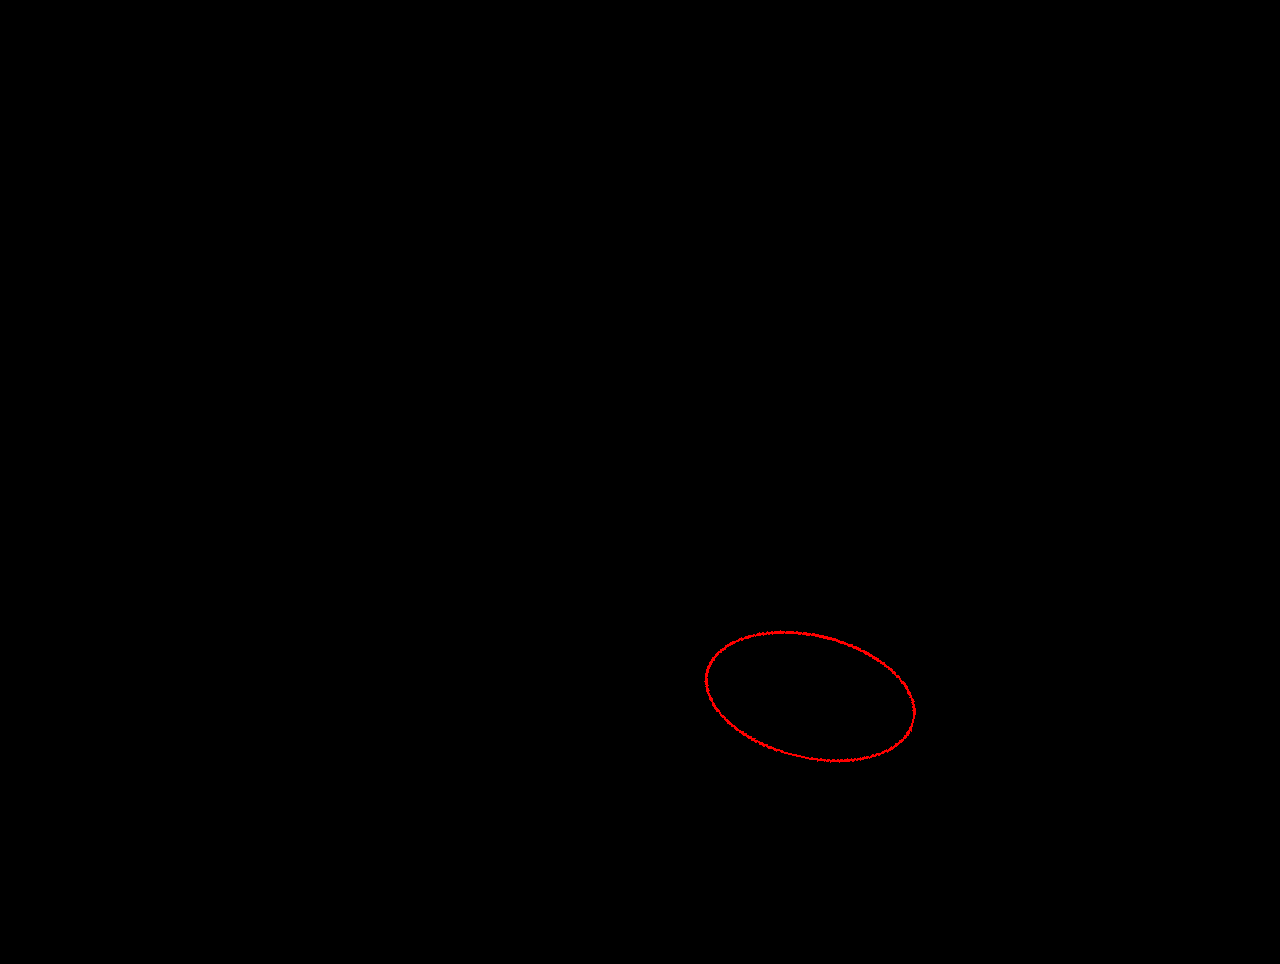

In [ ]:
im.putpalette([
    0, 0, 0, # black background
    255, 0, 0, # index 1 is red
    0, 255, 0, # index 2 is green
])

im